In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from ast import literal_eval
from matplotlib.patches import Patch

## Old vv

In [8]:
df = pd.read_csv("outs/gpt-4o.csv", usecols=["Experiment", "Proposer average of split@1", "Responder average of split@1", "Proposer average of split@last", "Responder average of split@last", "Proposer accepted average of split@last", "Responder accepted average of split@last"])

In [9]:
df.head()

,Experiment,Proposer average of split@1,Responder average of split@1,Proposer average of split@last,Responder average of split@last,Proposer accepted average of split@last,Responder accepted average of split@last
0,selfishness-fairness_mturn-belief_public-strat,"(6.0, 6.0, 6.0)","(4.0, 4.0, 4.0)","(5.45, 5.0, 6.0)","(4.55, 4.0, 5.0)","(5.45, 5.0, 6.0)","(4.55, 4.0, 5.0)"
1,selfishness-fairness_belief_public-strat-post,"(6.4, 6.0, 10.0)","(4.1, 4.0, 5.0)","(6.4, 6.0, 10.0)","(4.1, 4.0, 5.0)","(6.4, 6.0, 10.0)","(4.1, 4.0, 5.0)"
2,selfishness-fairness_belief_private-strat-post,"(6.0, 6.0, 6.0)","(4.0, 4.0, 4.0)","(6.0, 6.0, 6.0)","(4.0, 4.0, 4.0)","(6.0, 6.0, 6.0)","(4.0, 4.0, 4.0)"
3,selfishness-fairness_mturn-belief_private-strat,"(6.3, 6.0, 7.0)","(3.7, 3.0, 4.0)","(5.25, 5.0, 6.0)","(4.75, 4.0, 5.0)","(5.25, 5.0, 6.0)","(4.75, 4.0, 5.0)"
4,selfishness-fairness_belief_private-strat,"(6.1, 6.0, 7.0)","(3.9, 3.0, 4.0)","(6.1, 6.0, 7.0)","(3.9, 3.0, 4.0)","(6.0, 6.0, 6.0)","(4.0, 4.0, 4.0)"


In [43]:
proposer_data = df[['Experiment', 'Proposer average of split@1', 'Proposer average of split@last', 'Proposer accepted average of split@last']].values
responder_data = df[['Experiment', 'Responder average of split@1', 'Responder average of split@last', 'Responder accepted average of split@last']].values

In [45]:
proposer_data[:, 1:] = [[list(literal_eval(j)) for j in i] for i in proposer_data[:, 1:]]
responder_data[:, 1:] = [[list(literal_eval(j)) for j in i] for i in responder_data[:, 1:]]

In [88]:
# bar plot to show the average of split@1, split@last, and accepted split@last for proposer

proposer_df = pd.DataFrame(proposer_data, columns=['Experiment', 'Proposer average of split@1', 'Proposer average of split@last', 'Proposer accepted average of split@last'])
proposer_df = proposer_df.melt(id_vars=['Experiment'], var_name='split', value_name='average')
proposer_df['split'] = proposer_df['split'].apply(lambda x: ' '.join(x.split()[1:]))

In [89]:
proposer_df

,Experiment,split,average
0,selfishness-fairness_mturn-belief_public-strat,average of split@1,"[6.0, 6.0, 6.0]"
1,selfishness-fairness_belief_public-strat-post,average of split@1,"[6.4, 6.0, 10.0]"
2,selfishness-fairness_belief_private-strat-post,average of split@1,"[6.0, 6.0, 6.0]"
3,selfishness-fairness_mturn-belief_private-strat,average of split@1,"[6.3, 6.0, 7.0]"
4,selfishness-fairness_belief_private-strat,average of split@1,"[6.1, 6.0, 7.0]"
5,selfishness-fairness_mturn-belief_public-strat...,average of split@1,"[6.0, 6.0, 6.0]"
6,selfishness-fairness_vanilla-strat,average of split@1,"[5.9, 5.0, 6.0]"
7,selfishness-fairness_belief_public-strat,average of split@1,"[5.9, 5.0, 6.0]"
8,selfishness-fairness_mturn-vanilla-strat,average of split@1,"[6.0, 6.0, 6.0]"
9,selfishness-fairness_vanilla-strat-post,average of split@1,"[6.0, 6.0, 6.0]"


In [90]:
# first element of each list is the average, second element is the minimum, and third element is the maximum

proposer_df['avg'] = proposer_df['average'].apply(lambda x: round(x[0], 2))
proposer_df['min'] = proposer_df['average'].apply(lambda x: round(x[1], 2))
proposer_df['max'] = proposer_df['average'].apply(lambda x: round(x[2], 2))

/var/folders/64/qfbnk9gx6bqb3fbw3zmjw29c0000gp/T/ipykernel_44212/807899425.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.gca().plot([bar.get_x(), bar.get_x() + bar.get_width()], [proposer_df.iloc[i]['max'], proposer_df.iloc[i]['max']], 'k--', color='red')


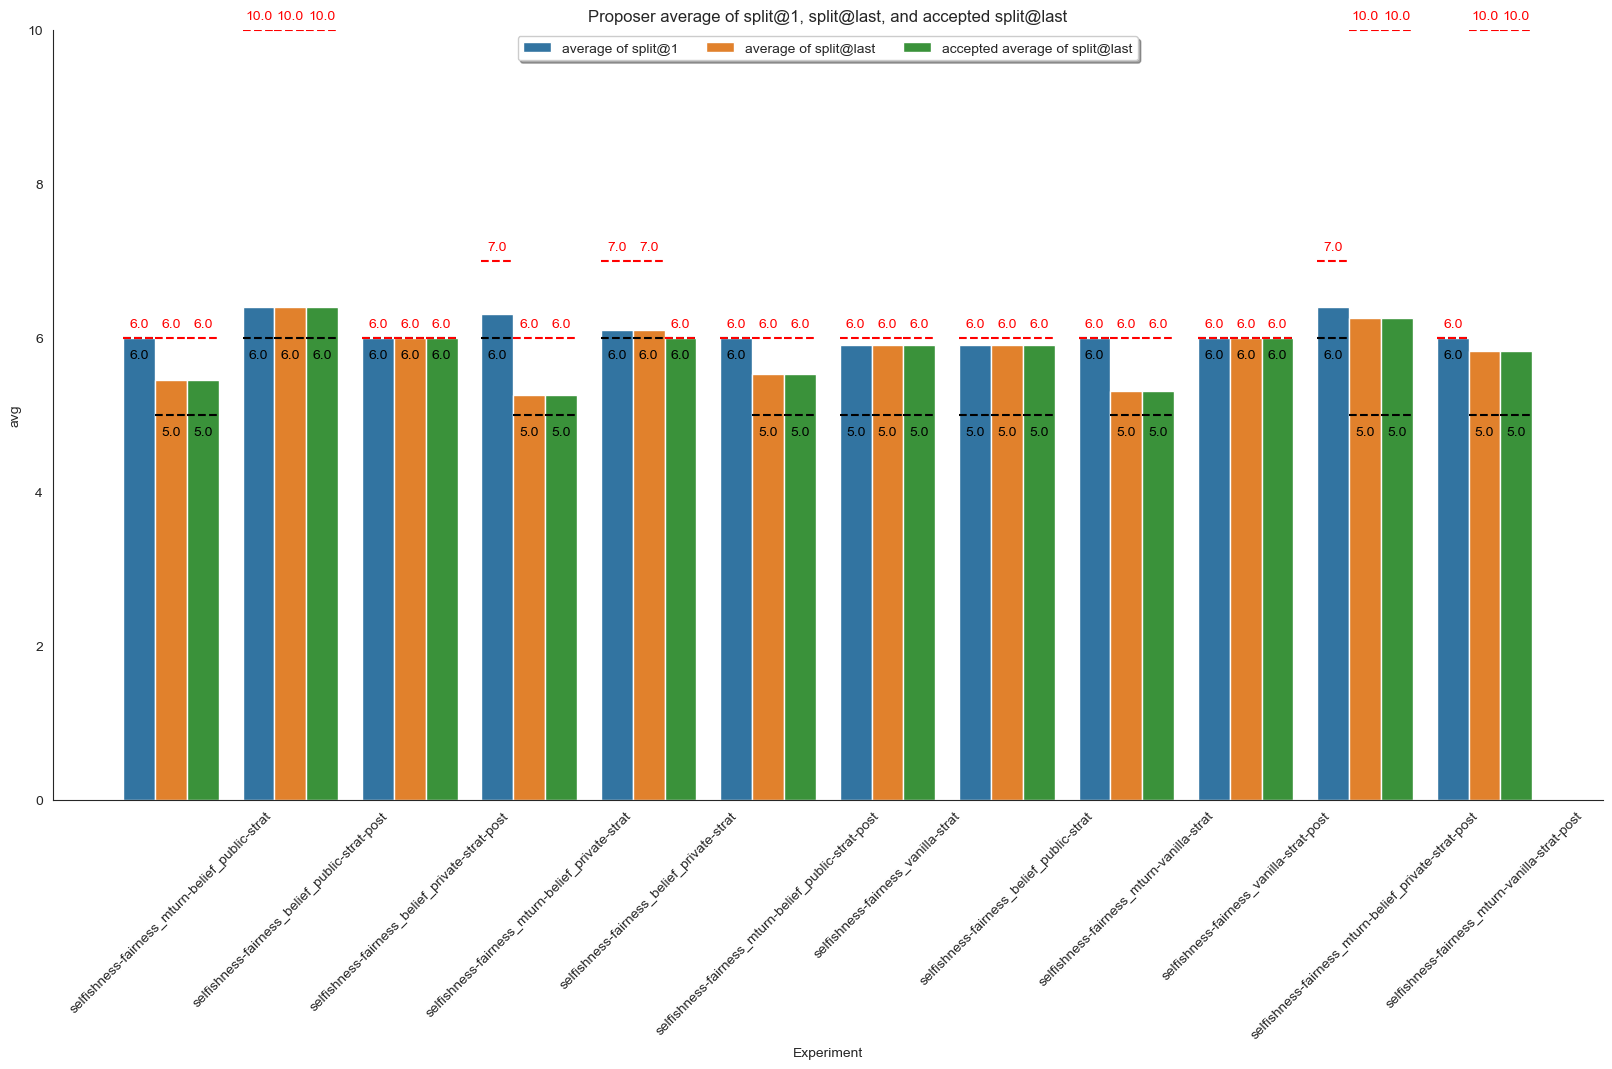

In [145]:
plt.figure(figsize=(20, 10))
sns.set_style('white')
# bargraph for avg and dotted lines for min and max
sns.barplot(x='Experiment', y='avg', hue='split', data=proposer_df)

for i, bar in enumerate(plt.gca().patches):
    if i>35:
        break
    plt.gca().plot([bar.get_x(), bar.get_x() + bar.get_width()], [proposer_df.iloc[i]['min'], proposer_df.iloc[i]['min']], 'k--')
    plt.gca().text(bar.get_x() + bar.get_width()/2, proposer_df.iloc[i]['min']-0.3, proposer_df.iloc[i]['min'], ha='center', va='bottom', color='black')
    plt.gca().text(bar.get_x() + bar.get_width()/2, proposer_df.iloc[i]['max']+0.1, proposer_df.iloc[i]['max'], ha='center', va='bottom', color='red')
    plt.gca().plot([bar.get_x(), bar.get_x() + bar.get_width()], [proposer_df.iloc[i]['max'], proposer_df.iloc[i]['max']], 'k--', color='red')

plt.ylim(0, 10)
plt.xticks(rotation=45)
plt.title('Proposer average of split@1, split@last, and accepted split@last')
plt.legend(loc='upper center', ncols=3, fancybox=True, shadow=True)
sns.despine()
plt.savefig('outs/proposer.pdf', format='pdf', dpi=500)

In [140]:
responder_df = pd.DataFrame(responder_data, columns=['Experiment', 'Responder average of split@1', 'Responder average of split@last', 'Responder accepted average of split@last'])
responder_df = responder_df.melt(id_vars=['Experiment'], var_name='split', value_name='average')
responder_df['split'] = responder_df['split'].apply(lambda x: ' '.join(x.split()[1:]))

In [141]:
responder_df['avg'] = responder_df['average'].apply(lambda x: round(x[0], 2))
responder_df['min'] = responder_df['average'].apply(lambda x: round(x[1], 2))
responder_df['max'] = responder_df['average'].apply(lambda x: round(x[2], 2))

/var/folders/64/qfbnk9gx6bqb3fbw3zmjw29c0000gp/T/ipykernel_44212/2546321648.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.gca().plot([bar.get_x(), bar.get_x() + bar.get_width()], [responder_df.iloc[i]['max'], responder_df.iloc[i]['max']], 'k--', color='red')


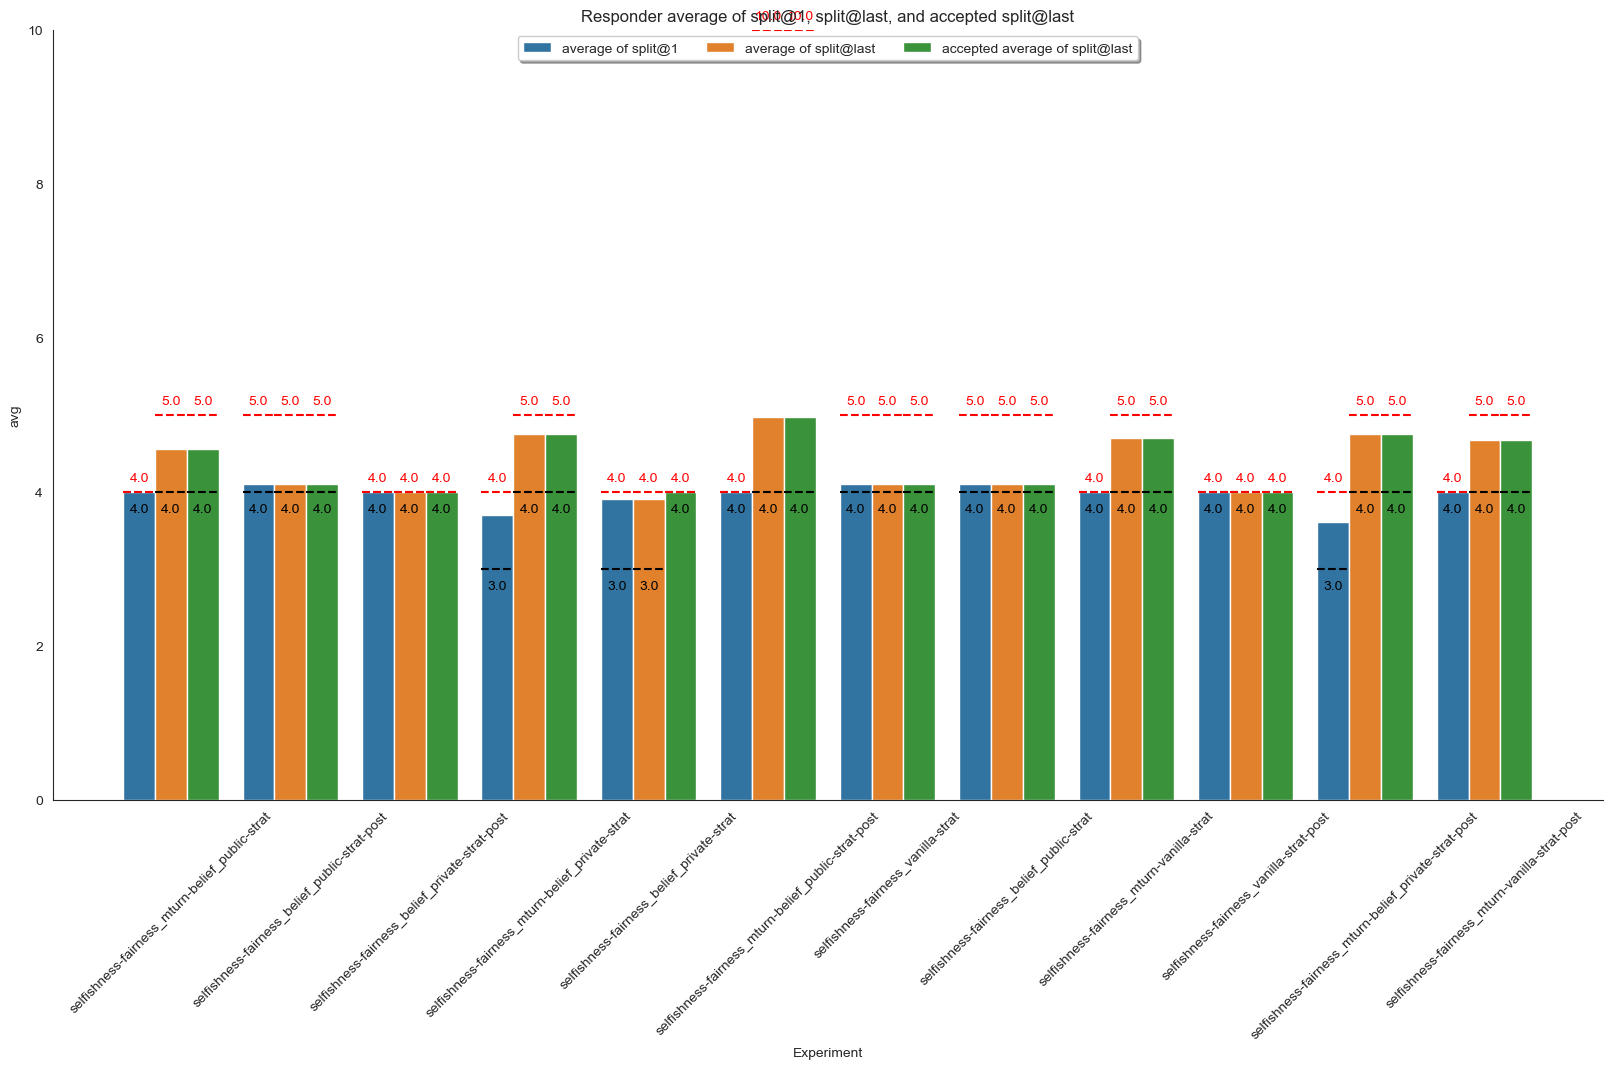

In [143]:
plt.figure(figsize=(20, 10))
sns.set_style('white')
# bargraph for avg and dotted lines for min and max
sns.barplot(x='Experiment', y='avg', hue='split', data=responder_df)

for i, bar in enumerate(plt.gca().patches):
    if i>35:
        break
    plt.gca().plot([bar.get_x(), bar.get_x() + bar.get_width()], [responder_df.iloc[i]['min'], responder_df.iloc[i]['min']], 'k--')
    plt.gca().text(bar.get_x() + bar.get_width()/2, responder_df.iloc[i]['min']-0.3, responder_df.iloc[i]['min'], ha='center', va='bottom', color='black')
    plt.gca().text(bar.get_x() + bar.get_width()/2, responder_df.iloc[i]['max']+0.1, responder_df.iloc[i]['max'], ha='center', va='bottom', color='red')
    plt.gca().plot([bar.get_x(), bar.get_x() + bar.get_width()], [responder_df.iloc[i]['max'], responder_df.iloc[i]['max']], 'k--', color='red')

plt.ylim(0, 10)
plt.xticks(rotation=45)
plt.title('Responder average of split@1, split@last, and accepted split@last')
plt.legend(loc='upper center', ncols=3, fancybox=True, shadow=True)
sns.despine()
plt.savefig('outs/responder.pdf', format='pdf', dpi=500)

## New

In [52]:
df = pd.read_csv("outs/selfishness-fairness.csv", usecols=["Experiment", "Proposer strategies", "Responder strategies"])

In [29]:
# df['id'] = [1, 2, 7, 4, 8, 5, 6, 3, 0]
# df.sort_values('id', inplace=True)

In [53]:
df

,Experiment,Proposer strategies,Responder strategies
0,Vanilla,"{1: 0, 2: 5, 3: 5, 4: 0, 5: 0, 6: 0}","{1: 7, 2: 0, 3: 3, 4: 0, 5: 0, 6: 0, 7: 0, 8: ..."
1,Private Beliefs,"{1: 0, 2: 9, 3: 1, 4: 0, 5: 0, 6: 0}","{1: 9, 2: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: ..."
2,Public Beliefs,"{1: 0, 2: 1, 3: 9, 4: 0, 5: 0, 6: 0}","{1: 10, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8:..."
3,Single-stake Vanilla,"{1: 0, 2: 7, 3: 6, 4: 0, 5: 0, 6: 0}","{1: 10, 2: 0, 3: 3, 4: 0, 5: 0, 6: 0, 7: 0, 8:..."
4,Single-stake Private Beliefs,"{1: 0, 2: 10, 3: 10, 4: 0, 5: 0, 6: 0}","{1: 10, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8:..."
5,Single-stake Public Beliefs,"{1: 0, 2: 10, 3: 2, 4: 0, 5: 0, 6: 0}","{1: 8, 2: 0, 3: 2, 4: 0, 5: 0, 6: 0, 7: 0, 8: ..."
6,Cumulative-stake Vanilla,"{1: 0, 2: 27, 3: 23, 4: 0, 5: 0, 6: 0}","{1: 23, 2: 0, 3: 9, 4: 0, 5: 0, 6: 0, 7: 18, 8..."
7,Cumulative-stake Private Beliefs,"{1: 10, 2: 37, 3: 3, 4: 0, 5: 0, 6: 0}","{1: 27, 2: 0, 3: 10, 4: 0, 5: 0, 6: 0, 7: 5, 8..."
8,Cumulative-stake Public Beliefs,"{1: 1, 2: 44, 3: 5, 4: 0, 5: 0, 6: 0}","{1: 36, 2: 0, 3: 10, 4: 0, 5: 1, 6: 0, 7: 3, 8..."


In [54]:
df['Experiment'] = ['Van.', 'Pvt. Bel.', 'Pub. Belf.', 'Sgl-stk Van.', 'Sgl-stk Pvt. Bel.', 'Sgl-stk Pub. Bel.', 'Cml-stk Van.', 'Cml-stk Pvt. Bel.', 'Cml-stk Pub. Bel.']

In [55]:
for i in range(len(df)):
    df.at[i, 'Proposer strategies'] = literal_eval(df.at[i, 'Proposer strategies'])
    df.at[i, 'Responder strategies'] = literal_eval(df.at[i, 'Responder strategies'])

In [56]:
exps = df['Experiment'].values
prop_strats = df['Proposer strategies'].values
resp_strats = df['Responder strategies'].values

In [57]:
markers = ['o', 'v', '^', 'X', 'P', 'D', 's', 'h', 'p']

In [58]:
prop_strats

array([{1: 0, 2: 5, 3: 5, 4: 0, 5: 0, 6: 0},
       {1: 0, 2: 9, 3: 1, 4: 0, 5: 0, 6: 0},
       {1: 0, 2: 1, 3: 9, 4: 0, 5: 0, 6: 0},
       {1: 0, 2: 7, 3: 6, 4: 0, 5: 0, 6: 0},
       {1: 0, 2: 10, 3: 10, 4: 0, 5: 0, 6: 0},
       {1: 0, 2: 10, 3: 2, 4: 0, 5: 0, 6: 0},
       {1: 0, 2: 27, 3: 23, 4: 0, 5: 0, 6: 0},
       {1: 10, 2: 37, 3: 3, 4: 0, 5: 0, 6: 0},
       {1: 1, 2: 44, 3: 5, 4: 0, 5: 0, 6: 0}], dtype=object)

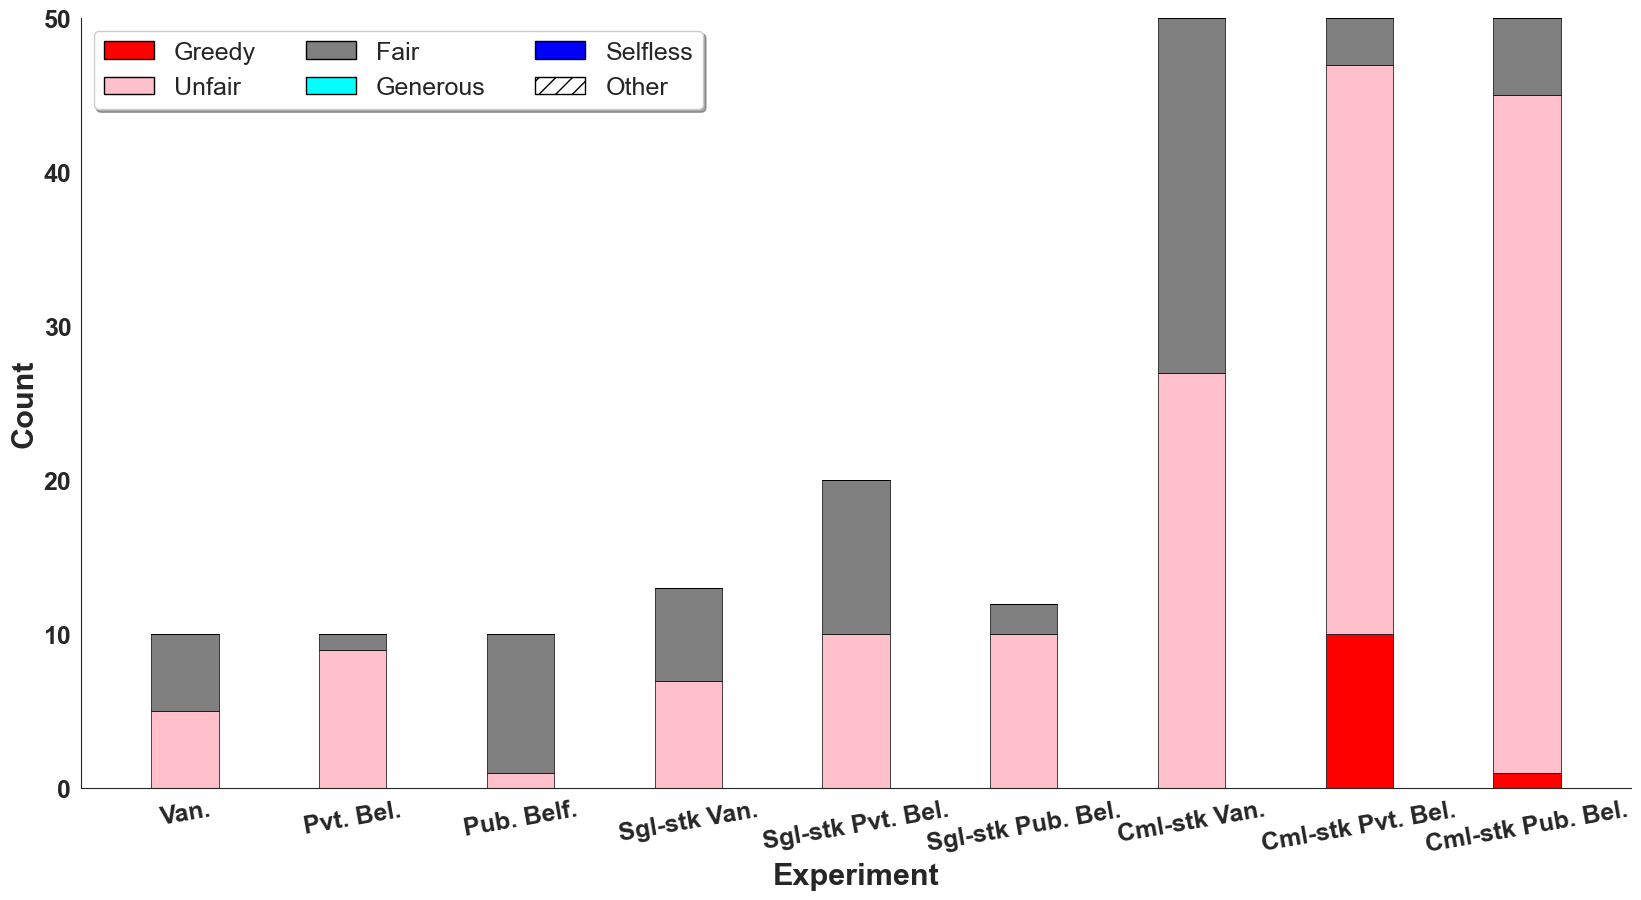

In [59]:
plt.figure(figsize=(20, 10))
sns.set_style('white')

# plot stacked bar graph for prop strats over exps showing proportion of each strat
for i, strat in enumerate(prop_strats):
    plt.bar(exps[i], strat[1], color='red', label='Greedy', edgecolor='black', linewidth=0.5, width=0.4)
    plt.bar(exps[i], strat[2], color='pink', bottom=strat[1], label='Unfair', edgecolor='black', linewidth=0.5, width=0.4)
    plt.bar(exps[i], strat[3], color='grey', bottom=[strat[1]+strat[2]], label='Fair', edgecolor='black', linewidth=0.5, width=0.4)
    plt.bar(exps[i], strat[4], color='cyan', bottom=[strat[1]+strat[2]+strat[3]], label='Generous', edgecolor='black', linewidth=0.5, width=0.4)
    plt.bar(exps[i], strat[5], color='blue', bottom=[strat[1]+strat[2]+strat[3]+strat[4]], label='Selfless', edgecolor='black', linewidth=0.5, width=0.4)
    plt.bar(exps[i], strat[6], color='white', bottom=[strat[1]+strat[2]+strat[3]+strat[4]+strat[5]], label='Other', edgecolor='black', linewidth=0.5, width=0.4, hatch="//")

# plt.title('Proposer strategies')
plt.xticks(rotation=10, fontweight='bold', fontsize=18)
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('Experiment', fontweight='bold', fontsize=22)
plt.ylabel('Count', fontweight='bold', fontsize=22)

plt.legend(handles=[Patch(facecolor='red', edgecolor='black', label='Greedy'), Patch(facecolor='pink', edgecolor='black', label='Unfair'), Patch(facecolor='grey', edgecolor='black', label='Fair'), Patch(facecolor='cyan', edgecolor='black', label='Generous'), Patch(facecolor='blue', edgecolor='black', label='Selfless'), Patch(facecolor='white', edgecolor='black', label='Other', hatch="//")], loc='upper left', ncol=3, fancybox=True, shadow=True, prop={'size': 18})
sns.despine()
plt.savefig('outs/sf-prop_strats.pdf', format='pdf', dpi=500, bbox_inches='tight')

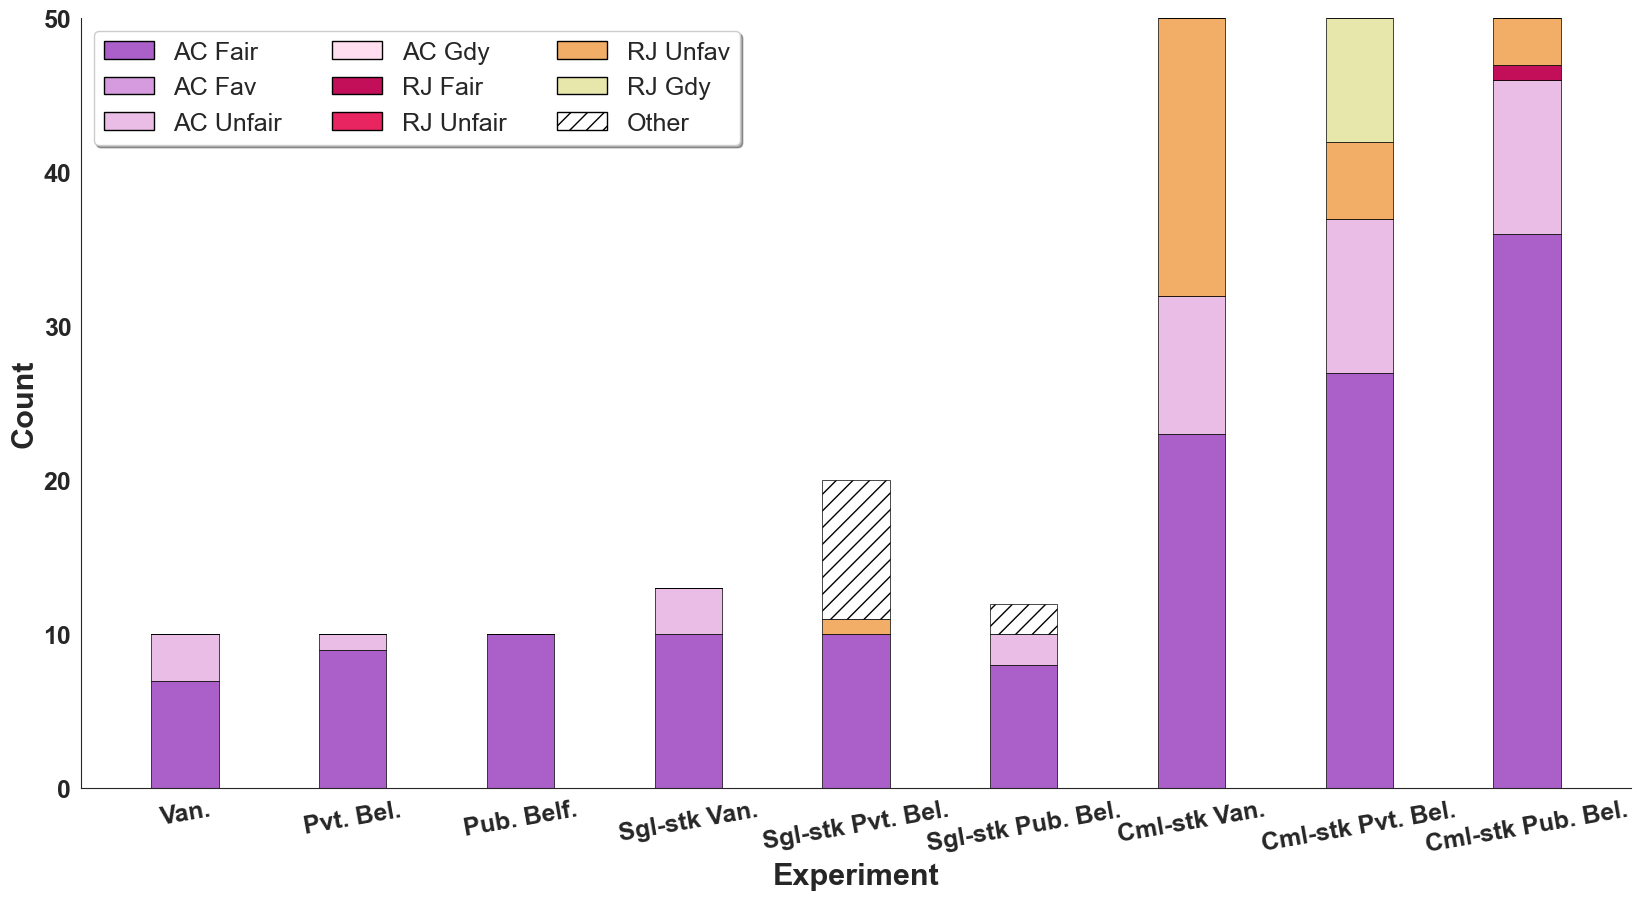

In [60]:
plt.figure(figsize=(20, 10))
sns.set_style('white')

# plot stacked bar graph for prop strats over exps showing proportion of each strat
for i, strat in enumerate(resp_strats):
    plt.bar(exps[i], strat[1], color='#AA60C8', label='AC Fair', edgecolor='black', linewidth=0.5, width=0.4)
    plt.bar(exps[i], strat[2], color='#D69ADE', bottom=strat[1], label='AC Fav', edgecolor='black', linewidth=0.5, width=0.4)
    plt.bar(exps[i], strat[3], color='#EABDE6', bottom=[strat[1]+strat[2]], label='AC Unfair', edgecolor='black', linewidth=0.5, width=0.4)
    plt.bar(exps[i], strat[4], color='#FFDFEF', bottom=[strat[1]+strat[2]+strat[3]], label='AC Gdy', edgecolor='black', linewidth=0.5, width=0.4)
    plt.bar(exps[i], strat[5], color='#C30E59', bottom=[strat[1]+strat[2]+strat[3]+strat[4]], label='RJ Fair', edgecolor='black', linewidth=0.5, width=0.4)
    plt.bar(exps[i], strat[6], color='#E82561', bottom=[strat[1]+strat[2]+strat[3]+strat[4]+strat[5]], label='RJ Fav', edgecolor='black', linewidth=0.5, width=0.4)
    plt.bar(exps[i], strat[7], color='#F2AE66', bottom=[strat[1]+strat[2]+strat[3]+strat[4]+strat[5]+strat[6]], label='RJ Unfair', edgecolor='black', linewidth=0.5, width=0.4)
    plt.bar(exps[i], strat[8], color='#E8E7AB', bottom=[strat[1]+strat[2]+strat[3]+strat[4]+strat[5]+strat[6]+strat[7]], label='RJ Gdy', edgecolor='black', linewidth=0.5, width=0.4)
    plt.bar(exps[i], strat[9], color='white', bottom=[strat[1]+strat[2]+strat[3]+strat[4]+strat[5]+strat[6]+strat[7]+strat[8]], label='Other', edgecolor='black', linewidth=0.5, width=0.4, hatch="//")

# plt.title('Responder strategies', fontweight='bold', fontsize=25)
plt.xticks(rotation=10, fontweight='bold', fontsize=18)
plt.yticks(fontweight='bold', fontsize=18)
plt.xlabel('Experiment', fontweight='bold', fontsize=22)
plt.ylabel('Count', fontweight='bold', fontsize=22)

plt.legend(handles=[Patch(facecolor='#AA60C8', edgecolor='black', label='AC Fair'), Patch(facecolor='#D69ADE', edgecolor='black', label='AC Fav'), Patch(facecolor='#EABDE6', edgecolor='black', label='AC Unfair'), Patch(facecolor='#FFDFEF', edgecolor='black', label='AC Gdy'), Patch(facecolor='#C30E59', edgecolor='black', label='RJ Fair'), Patch(facecolor='#E82561', edgecolor='black', label='RJ Unfair'), Patch(facecolor='#F2AE66', edgecolor='black', label='RJ Unfav'), Patch(facecolor='#E8E7AB', edgecolor='black', label='RJ Gdy'), Patch(facecolor='white', edgecolor='black', label='Other', hatch="//")], loc='upper left', ncol=3, fancybox=True, shadow=True, prop={'size': 18})
sns.despine()
plt.savefig('outs/sf-resp_strats.pdf', format='pdf', dpi=500, bbox_inches='tight')